In [ ]:
# install scikit
!pip install -U scikit-learn

# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn_pandas import DataFrameMapper

# import data
train_data = 'data/adult.data'
test_data = 'data/adult.test'

# assign corresponding column names
columns = ['Age','Workclass','fnlgwt','Education','EdNum','MaritalStatus',
           'Occupation','Relationship','Race','Sex','CapitalGain',
           'CapitalLoss','HoursPerWeek','Country','Income']

# declaring dataframe for train set
train_df = pd.read_csv(train_data, names=columns)
train_df.head()

,Age,Workclass,fnlgwt,Education,EdNum,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
# declaring dataframe for train set, skip first row as it is useless
test_df = pd.read_csv(test_data, names=columns, skiprows=1)
test_df.head()


,Age,Workclass,fnlgwt,Education,EdNum,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,Country,Income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [ ]:
# describe the train set
train_df.describe()

,Age,fnlgwt,EdNum,CapitalGain,CapitalLoss,HoursPerWeek
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
# describe the test set
test_df.describe()

,Age,fnlgwt,EdNum,CapitalGain,CapitalLoss,HoursPerWeek
count,16281.000000,1.628100e+04,16281.000000,16281.000000,16281.000000,16281.000000
mean,38.767459,1.894357e+05,10.072907,1081.905104,87.899269,40.392236
std,13.849187,1.057149e+05,2.567545,7583.935968,403.105286,12.479332
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.167360e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.778310e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.383840e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,3770.000000,99.000000


# Prep the Data

In [ ]:
# delete the column fnlgwt as it is unecessary
train_df.drop('fnlgwt', axis=1, inplace=True)
test_df.drop('fnlgwt', axis=1, inplace=True)

# education is not a standardised metric while ednum is. for this, we will drop education column
# we will also drop the country column as it is least impactful to the data
train_df.drop(["Country", "Education"], axis=1, inplace=True)
test_df.drop(["Country", "Education"], axis=1, inplace=True)

# store the headers of the table into a list
# we will group the age and ednum as different ranges to better visualise and analyse trends
headlist = list(train_df.columns)
headlist.remove('Age')
headlist.remove('EdNum')
headlist = ['AgeGroup', 'EduLevel']+headlist

# we will use multiples of 10 for age, and 5 for education level
# use the format method to quickly create a list of character types
labels = ["{0}-{1}".format(i, i+9) for i in range(0,100,10)]
train_df['AgeGroup'] = pd.cut(train_df.Age, range(0,101,10), right = False, labels = labels)
test_df['AgeGroup'] = pd.cut(test_df.Age, range(0,101,10), right = False, labels = labels)

# repeat above block for increments of 5
labels = ["{0}-{1}".format(i,i+4) for i in range(0,20,5)]
train_df['EduLevel'] = pd.cut(train_df.EdNum, range(0,21,5), right = False, labels = labels)
test_df['EduLevel'] = pd.cut(test_df.EdNum, range(0,21,5), right = False, labels = labels)

# replace the '？' with 'Unspecified'
for i in train_df.columns:
    train_df[i].replace('?', 'Unspecified', inplace=True)
    train_df[i].replace('?', 'Unspecified', inplace=True)

# remove dot and space from non-int64 type data
for col in train_df.columns:
    if train_df[col].dtype != 'int64':
        train_df[col] = train_df[col].apply(lambda val: val.replace(" ", ""))
        train_df[col] = train_df[col].apply(lambda val: val.replace(".", ""))
        test_df[col] = test_df[col].apply(lambda val: val.replace(" ", ""))
        test_df[col] = test_df[col].apply(lambda val: val.replace(".", ""))

# Extract the columns in colnames and sort by colnames
train_df = train_df[headlist]
test_df = test_df[headlist]

In [ ]:
train_df.head()

,AgeGroup,EduLevel,Workclass,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,Income
0,30-39,10-14,State-gov,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,<=50K
1,50-59,10-14,Self-emp-not-inc,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,<=50K
2,30-39,5-9,Private,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,<=50K
3,50-59,5-9,Private,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,<=50K
4,20-29,10-14,Private,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,<=50K


In [ ]:
test_df.head()

,AgeGroup,EduLevel,Workclass,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,Income
0,20-29,5-9,Private,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,<=50K
1,30-39,5-9,Private,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,<=50K
2,20-29,10-14,Local-gov,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,>50K
3,40-49,10-14,Private,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,>50K
4,10-19,10-14,?,Never-married,?,Own-child,White,Female,0,0,30,<=50K


In [ ]:
# in this section, we will convert non-numeric data into continuous variables to allow for quantifiable values
# DataFrameMapper class in the pandas is utilised to encode each columns
mapper = DataFrameMapper([('AgeGroup', LabelEncoder()),('EduLevel', LabelEncoder()),
                          ('Workclass', LabelEncoder()),('MaritalStatus', LabelEncoder()),
                          ('Occupation', LabelEncoder()),('Relationship', LabelEncoder()),
                          ('Race', LabelEncoder()),('Sex', LabelEncoder()),
                          ('Income', LabelEncoder())], df_out=True, default=None)

# income will be our y-axis so we will isolate it as a sample marker
cols = list(train_df.columns)
cols.remove('Income')
cols = cols[:-3]+['Income']+cols[-3:]

# we use fit_transform() method to normalize and fit the data
df_train = mapper.fit_transform(train_df.copy())
df_train.columns = cols
df_test = mapper.transform(test_df.copy())
df_test.columns = cols
cols.remove('Income')

In [ ]:
# Training data and test data division
x_train, y_train = df_train[cols].values, df_train['Income'].values
x_test, y_test = df_test[cols].values, df_test['Income'].values

# 1. Naive Bayes Classifier

In [ ]:
%%time
# build the Naive Bayes Classifier model using sklearn's GaussianNB library
from sklearn.naive_bayes import GaussianNB
gaussianNB = GaussianNB()
gaussianNB.fit(x_train, y_train)
score = gaussianNB.score(x_test, y_test)
print('Naive Bayes Classifier Score:', score)


Naive Bayes Classifier Score: 0.7980468030219274
CPU times: user 19.1 ms, sys: 3.83 ms, total: 22.9 ms
Wall time: 27.7 ms


In [ ]:
# cross-validate accuracies
from sklearn.model_selection import cross_val_score
num_validations=10
accuracy=cross_val_score(gaussianNB,x_test, y_test,
                         scoring='accuracy',cv=num_validations)
# accuracy calculation
print('Accuracy：{:.2f}%'.format(accuracy.mean()*100))
precision=cross_val_score(gaussianNB,x_test, y_test,
                         scoring='precision_weighted',cv=num_validations)

# precision calculation
print('Precision：{:.2f}%'.format(precision.mean()*100))

# recall calculation
recall=cross_val_score(gaussianNB,x_test, y_test,
                         scoring='recall_weighted',cv=num_validations)
print('Recall：{:.2f}%'.format(recall.mean()*100))

# F1-score
f1=cross_val_score(gaussianNB,x_test, y_test,
                         scoring='f1_weighted',cv=num_validations)
print('F1-score：{:.2f}%'.format(f1.mean()*100))

Accuracy：79.76%
Precision：77.72%
Recall：79.76%
F1-score：76.86%


# 2. Decision Tree Classifier

In [ ]:
%%time
from sklearn.metrics import accuracy_score

treeClassifier = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
treeClassifier.fit(x_train, y_train)

# predict on test set
y_pred = treeClassifier.predict(x_test)

# calculate accurace between prediction data and test data
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8084884220870954
CPU times: user 38.2 ms, sys: 863 µs, total: 39.1 ms
Wall time: 51.7 ms


Confusion Matrix
[[10689  1746]
 [ 1372  2474]]
Normalized Confusion Matrix
[[0.8596 0.1404]
 [0.3567 0.6433]]


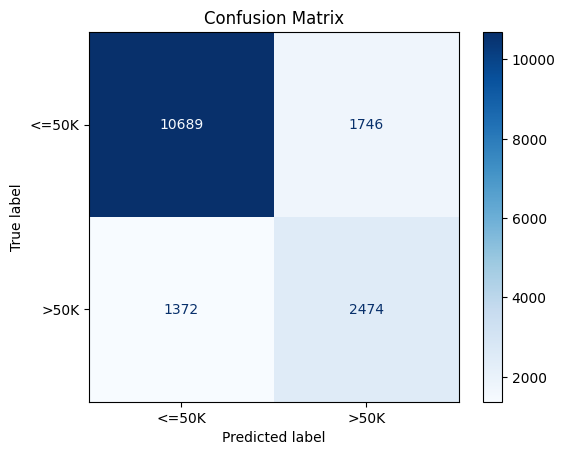

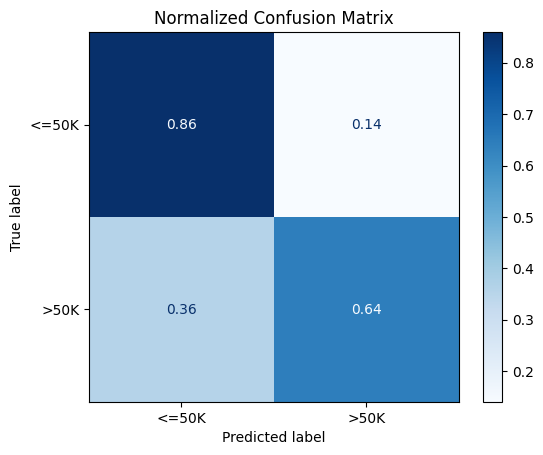

In [ ]:
# confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
np.set_printoptions(precision=4)
titles_options = [('Confusion Matrix',None),
                  ('Normalized Confusion Matrix', 'true')]
class_names = [test_df['Income'][1],test_df['Income'][2]]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(treeClassifier, x_test, y_test,
                                 display_labels = class_names,
                                 cmap = plt.cm.Blues,
                                 normalize = normalize)
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)

Optimised score after grid search: 0.859341135592287
Score after grid search: 0.8568883975185799
Normalized Confusion Matrix
[[0.932  0.068 ]
 [0.3861 0.6139]]


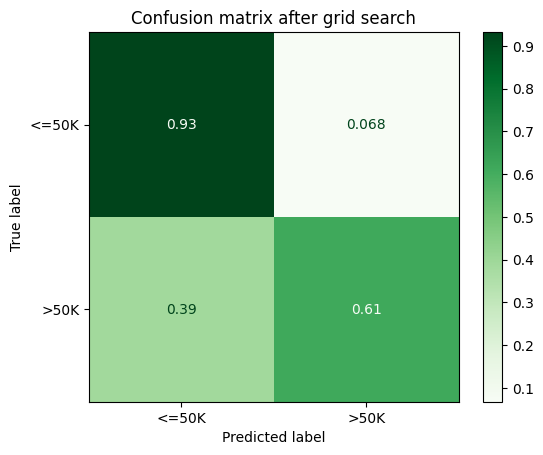

In [ ]:
# optimise hyperparameters with grid search
from sklearn.model_selection import GridSearchCV
parameters = {'max_features':(None, 9, 6),
         'max_depth':(None, 24, 16),
         'min_samples_split':(2, 4, 8),
         'min_samples_leaf':(16, 4, 12)
    }

# calculating the clf, which stores trained model values used for prediction
clf = GridSearchCV(treeClassifier, parameters, cv = 10)
clf.fit(x_train, y_train)
clf.best_score_, clf.score(x_test, y_test), clf.best_params_
print('Optimised score after grid search:', clf.best_score_)
print('Score after grid search:', clf.score(x_test, y_test))
disp2 = ConfusionMatrixDisplay.from_estimator(clf, x_test, y_test,
                              display_labels = class_names,
                              cmap = plt.cm.Greens,
                              normalize = 'true')
disp2.ax_.set_title('Confusion matrix after grid search')
print(title)
print(disp2.confusion_matrix)